In [23]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Final Project, Part 2
##### Prachi Doshi

The project is done in a Team of 2. The team mates and their details are:

##### Shraddha Tiwari (tiwari5)
##### Prachi Doshi (ppdoshi2)

While this submission is done by me, my teammate Shraddha will submit her individual jupyter notebook as instructed in the assignment details.

In this part of our Final Project, we have developed an interactive Dashboard in terms of a Domain expert as well as explanation for using the interactive Dashboard:

### Getting our usual libraries:

In [1]:
import matplotlib.pyplot as plt  # For creating and manipulating figures and plotting areas
import matplotlib # For creating plots
import numpy as np # For numeric representation of the data
import pandas as pd # For DataFrame manipulation
%matplotlib inline
import ipywidgets  # For interactivity
from ipywidgets import Dropdown # for the extra interactive widget part
from ipywidgets import VBox, HBox, Layout # for the extra interactive widget part
import bqplot
from bqplot import pyplot as plot
from bqplot import Tooltip
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.plotting import show
import ipywidgets as widgets

### Getting the data:

In [2]:
with open('./flipkart_fashion_products_dataset.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)

df.to_csv('flipkart_fashion_products_dataset_1.csv', encoding='utf-8', index=False)

In [3]:
df.head(5)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
df = df.astype({'actual_price':'string','selling_price':'string','average_rating':'string', 'discount':'string'})
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['selling_price'] = df['selling_price'].str.replace(',', '')
df['discount'] = df['discount'].str.replace('% off', '')

df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

### Coalation of similar subcategories in the data:

In [5]:
df['average_rating'] = df['average_rating'].replace(np.nan, 0)
df['discount'] = df['discount'].replace(np.nan, 0)

df['sub_category'].replace(to_replace = ['Clothing Accessories', 'Crocks Club Clothing and Accessories',
'Inspire Clothing and Accessories', 'INSPIRE Clothing and Accessories', 'Roy Clothing and Accessories', 'Uber Urban Clothing and Accessories'],
 value = 'Clothing and Accessories',
 inplace = True)

df['sub_category'].replace(to_replace = ['Kurtas, Ethnic Sets and Bottoms'],
 value = 'Ethnic Wear',
 inplace = True)

df['sub_category'].replace(to_replace = ['Blazers, Waistcoats and Suits'],
 value = 'Formal Wear',
 inplace = True)

df['sub_category'].replace(to_replace = ['Sleepwear', 'Tracksuits'],
 value = 'Sleep Wear',
 inplace = True)

df['sub_category'].replace(to_replace = ["Men's Footwear"],
 value = 'Footwear',
 inplace = True)

df['sub_category'].replace(to_replace = ['SUNSHOPPING Bags, Wallets & Belts', 'Sunshopping Bags, Wallets & Belts', 'Winsome Deal Bags, Wallets & Belts', 
                                        'YOFAMA Bags, Wallets & Belts', 'Brand Trunk Bags, Wallets & Belts', 'mentiezi Bags, Wallets & Belts'],
 value = 'Bags, Wallets & Belts',
 inplace = True)

### Exploring values of Features at a granular / unique level: 

In [6]:
df['discount'].unique()

array([69., 66., 68., 74., 63., 67., 64., 76., 49., 61., 48., 70., 71.,
       29., 79., 73., 80., 81., 72., 77., 82., 84., 54., 83., 78., 22.,
       47., 35., 56., 75., 62., 60., 51., 44., 33., 50., 25., 28., 45.,
       53., 40., 52., 30., 57., 42., 65., 59., 55., 58., 46., 41., 34.,
       43., 38., 39., 86., 87., 12., 37.,  5., 31., 24., 27., 32.,  4.,
        0., 23., 20.,  9., 36., 21.,  1., 10., 17.,  8.,  6.,  2., 15.,
        3., 11., 16.,  7., 18., 14., 26., 13., 19., 85.])

In [7]:
df['average_rating'].unique()

array([3.9, 3.8, 3.7, 3.3, 4.5, 3.5, 4.2, 4.3, 2.7, 4.7, 0. , 4. , 4.4,
       2. , 2.6, 3. , 2.9, 2.2, 4.8, 3.2, 3.6, 4.1, 2.8, 3.4, 4.9, 3.1,
       5. , 2.4, 2.3, 2.1, 1.9, 1. , 2.5, 4.6, 1.7, 1.8, 1.5, 1.6, 1.3])

### Creating a new categorical variable for rating groups:

In [8]:
rating_category = pd.cut(df.average_rating,bins=[0,1.0,2.0,3.0,4.0,5.0],labels=['1-Star','2-Star','3-Star','4-Star','5-Star'])
df.insert(6,"Rating_Group",rating_category)

In [9]:
df.head(5)

,_id,actual_price,average_rating,brand,category,crawled_at,Rating_Group,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,4-Star,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,4-Star,Yorker trackpants made from 100% rich combed c...,66.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,4-Star,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,4-Star,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,4-Star,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


### Creating the static visualization of our first view of the Dashboard:

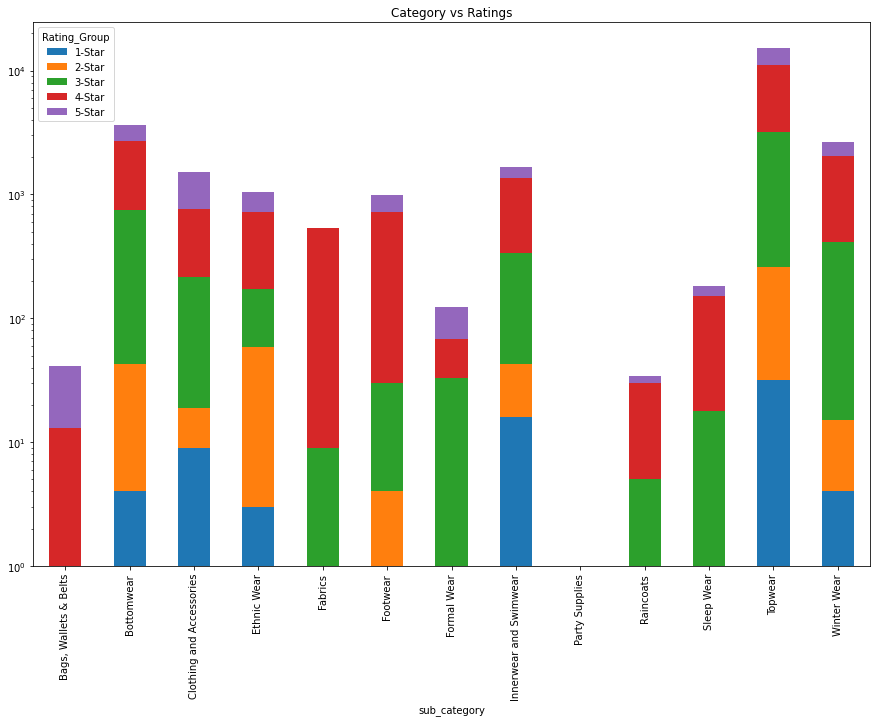

In [10]:
stackedBar_data = df[['sub_category', 'Rating_Group']].value_counts().reset_index().rename(columns = {0: 'value'})
stackedBar_data = stackedBar_data.loc[stackedBar_data['Rating_Group'] != 'Unknown']
stackedBar_data.pivot(index='sub_category', columns='Rating_Group', values='value').plot(kind='bar', stacked = True, figsize=(15,10), title = 'Category vs Ratings', log=True)

### Creating bar chart for Average Selling Price per Brand:

Text(0.5, 1.0, 'Average Selling Price of products per Brand')

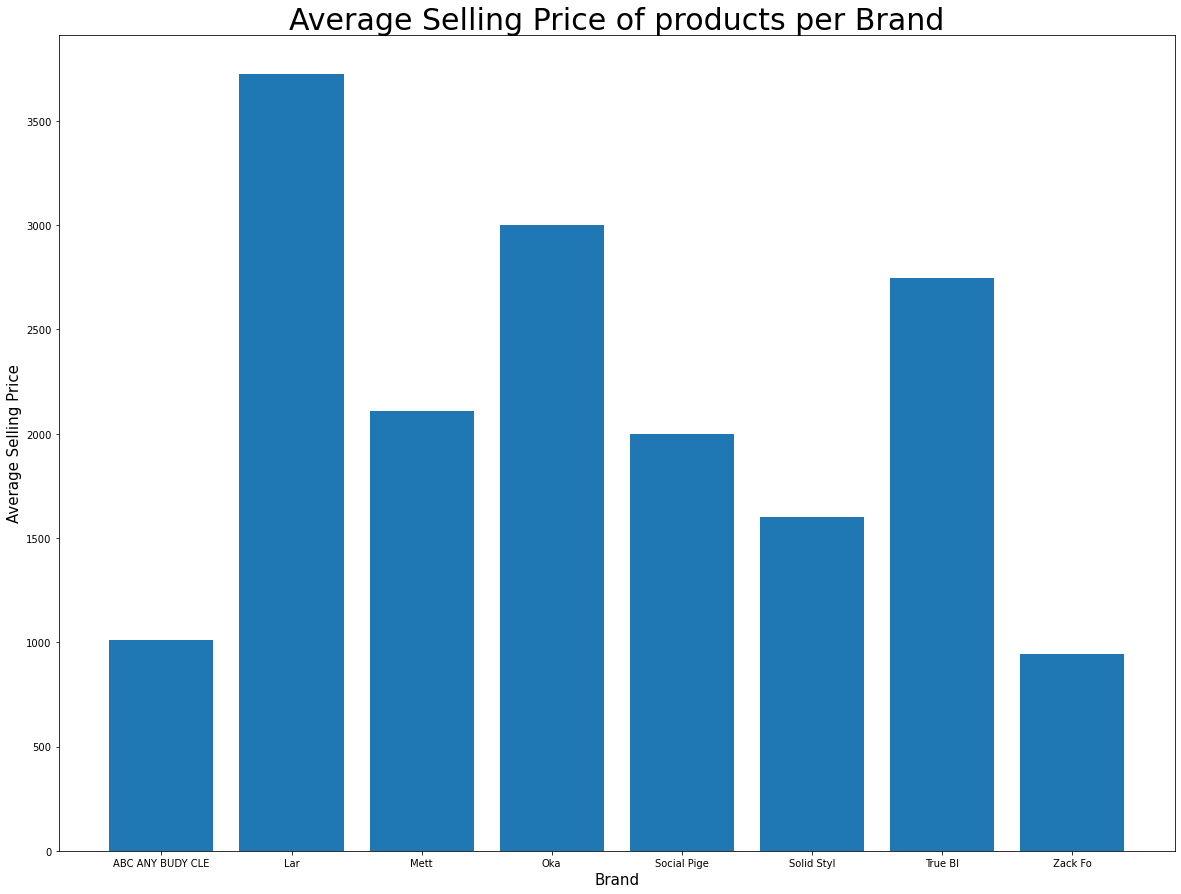

In [11]:
fig, ax = plt.subplots(figsize=(20,15)) 

bar1_data = df[df['sub_category']== 'Formal Wear'].groupby('brand')['selling_price'].mean()
ax.bar(bar1_data.index, bar1_data.values)
ax.set_xlabel('Brand', fontsize = 15)
ax.set_ylabel('Average Selling Price', fontsize = 15)
ax.set_title('Average Selling Price of products per Brand', fontsize = 30)


### Creating the Interactivity for the dashboard!

In [12]:
# Code for stacked bar chart

figa = plot.figure(title = 'Category vs Ratings')

df1 = df.groupby(["sub_category", "Rating_Group"])._id.count().unstack('Rating_Group')

sc_x = bqplot.OrdinalScale()
sc_y = bqplot.LinearScale()
scales = {"x": sc_x, "y": sc_y}


categories = plot.bar(x = df1.index, 
                 y= [df1['1-Star'],df1['2-Star'],df1['3-Star'],df1['4-Star'],df1['5-Star']],
                 scales= scales,
                 labels = ['1-Star','2-Star','3-Star','4-Star','5-Star'],
                 interactions = {'click': 'select', 'hover': 'tooltip'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.5},
                 display_legend = True)

categories.type = "stacked"
categories.colors = bqplot.CATEGORY10


plot.xlabel("Category")
plot.ylabel("Ratings")
figa.axes[0].tick_rotate = -30
figa.axes[0].tick_style = {'text-anchor': 'end', 'offset': '40px', 'font-size': 10}
figa.axes[0].label_offset = '55px'
figa.legend_location = 'top-left'
figa.legend_text = {'font-size': 12}
figa.legend_style = {'width': 'auto'}

#####################################################################
y_range = widgets.IntRangeSlider(value=[1,15000],
                        min=1,
                        max=15000,
                        step=(15000 - 1) / 100,
                        description="Y Axis",
                        disabled=False,
                        continuous_update=False,
                        orientation='horizontal',
                        readout=True)

def updateYAxis(change1):
    #Update Y-axis min/max value here
    if change1['type'] == 'change' and change1['name'] == 'value':
        sc_y.min = change1['new'][0]
        sc_y.max = change1['new'][1]
    

y_range.observe(updateYAxis)
figa = widgets.VBox([figa, y_range])

#####################################################################
# referenced the above version of code for y slider from here:
# https://github.com/bqplot/bqplot/issues/712



# Code for the vertical bar chart for average selling price

figb = plot.figure(title = "Average Selling Price of products per Brand")

figb.layout.height = "400px"
figb.layout.width = "600px"

subset = df.loc[df['category'] == 'Footwear']

price_mean = subset.groupby("brand").selling_price.mean()


price_plot = plot.bar(x = price_mean.index.tolist(), 
                       y= price_mean.values.tolist(), 
                       orientation = 'vertical',
                      tick_style ={'font-size': 100})

#price_plot.colors = ["#06C2AC"]
price_plot.colors = "palevioletred"
plot.xlabel("Brand")
plot.ylabel("Average Selling Price")

figb.axes[0].tick_rotate = -60
figb.axes[0].tick_style = {'text-anchor': 'end', 'offset': '40px', 'font-size': 10}
figb.axes[0].label_offset = '40px'

# Code for the vertical bar chart for average actual price

figc = plot.figure(title = "Average Actual Price of products per Brand")

figc.layout.height = "500px"
figc.layout.width = "700px"

subset1 = df.loc[df['category'] == 'Footwear']

price_mean1 = subset.groupby("brand").actual_price.mean()


price_plot1 = plot.bar(x = price_mean1.index.tolist(), 
                       y= price_mean1.values.tolist(), 
                       orientation = 'vertical',
                      tick_style ={'font-size': 100})

price_plot1.colors = ["#06C2AC"]
plot.xlabel("Brand")
plot.ylabel("Average Actual Price")

figc.axes[0].tick_rotate = -60
figc.axes[0].tick_style = {'text-anchor': 'end', 'offset': '40px', 'font-size': 10}
figc.axes[0].label_offset = '40px'

### Creating output placeholders for tooltips:

In [13]:
out = ipywidgets.Output()
out1 = ipywidgets.Output(layout={'border': '1px solid black', 
                                 'margin': '0 0 0 0'})
out2 = ipywidgets.Output(layout={'border': '1px solid black', 
                                 'margin': '0 0 0 0'})
out3 = ipywidgets.Output(layout={'border': '1px solid black', 
                                 'margin': '0 0 0 0'})

### Adding the code for interactivity in the visualizations:

In [14]:
# Code for tooltip for the stacked bar chart
def on_hover_categories(_, event):
    out1.clear_output()
    with out1:
        print(f"Category: {event['data']['x']}\n"\
              f"Rating Group: {df1.columns[event['data']['colorIndex']]}\n"\
              f"Rating Count: {event['data']['y']}\n")
    categories.tooltip = out1

# Code for tooltip for the bar chart    
def on_hover_selling_price_mean(_, event):
    out2.clear_output()
    with out2:
        print(f"Brand: {event['data']['x']}\n"
              f"Average Selling Price: {event['data']['y']}\n")
    price_plot.tooltip = out2

# Code for tooltip for the bar chart    
def on_hover_actual_price_mean1(_, event):
    out3.clear_output()
    with out3:
        print(f"Brand: {event['data']['x']}\n"
              f"Average Actual Price: {event['data']['y']}\n")
    price_plot1.tooltip = out3

# Calback function to interact with bar plot
def on_selected(self, change, df):
    #print(change, self)
    category_selected = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    for mark in self.selected:
        category_selected = self.x[mark]

    subset = df.loc[df['sub_category'] == category_selected]

    price_mean = subset.groupby("brand").selling_price.mean()
    
    price_plot.x = price_mean.index.tolist()
    price_plot.y = price_mean.values.tolist()
    
    subset1 = df.loc[df['sub_category'] == category_selected]

    price_mean1 = subset.groupby("brand").actual_price.mean()
    
    price_plot1.x = price_mean1.index.tolist()
    price_plot1.y = price_mean1.values.tolist()

categories.on_hover(on_hover_categories)
categories.on_element_click(lambda _, x: on_selected(_, x, df))
price_plot.on_hover(on_hover_selling_price_mean)
price_plot1.on_hover(on_hover_actual_price_mean1)

## The Dashboard

### How to use it and what does it show?

This visualization gives the user an idea of how all Products within each Subcategory fare in terms of Consumer Ratings. The Bar chart is a stacked visualization, wherein each color code depicts the distribution of the 5 Categories of Rating Groups. </br>

- The height of each bar within the chart represents the total ratings received by the products listed under that Subcategory. However, each separate color-coded section within a single stacked bar denotes the division of star ratings. </br>

- Upon hovering on any section of the visualization, the user can see the Category being highlighted with the hover, the Rating Group, and the count of ratings under that Rating Group. </br>

- The user can also adjust the scale of the Y-axis to closely examine the Subcategories and their Rating Groups. A slider with this functionality is present just below the graph which enables the user to perform the scaling action on the dynamic visualization. </br>

- While clicking on the individual bars, the visualization provides an interactive aspect of drilling down to a more granular level. The selection of any SubCategory in the stacked bar chart will deliver two more bar charts below the dashboard.  Each of these bar charts is a deeper view of the main dashboard graph. </br>

- The first bar graph represents the view of how different brands are competing in the area of Selling Price for their individual products under the clicked Subcategory. This is done by a comparison of the average Selling Price calculated and plotted against the Brands under the SubCategory. </br>

- Similarly, the second graph gives an idea of the Actual Price of products listed by their Brands under the clicked Subcategory. This is plotted based on how well the brands fare with the average Actual Price calculated for every brand under the Subcategory. </br>

With a comparative view, the user can understand the difference in Brand competition in the market for any selected Subcategory that they select. It provides insights and patterns to understand the placement and pricing of products for improvement.


### Creating the dashboard by combining all three visualizations:

In [15]:
figa.layout.min_width = '100%'
figb.layout.min_width = '100%'
figc.layout.min_width = '100%'
my_dashboard = ipywidgets.VBox([figa, figb, figc])
my_dashboard.layout.width = 'auto'
# my_dashboard.layout.display = 'flex'
display(my_dashboard)
type(my_dashboard)

ipywidgets.widgets.widget_box.VBox

### Creating a new categorical variable for dicount range:

In [16]:
discount_range = pd.cut(df.discount,bins=[0,10,20,30,40,50,60,70,80,90],labels=['Below 10%','10%-20%','20%-30%','30%-40%','40%-50%', '50%-60%', '60%-70%', '70%-80%', 'Above 80%'])
df.insert(6,"Discount Range",discount_range)

In [17]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,Discount Range,Rating_Group,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,60%-70%,4-Star,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,60%-70%,4-Star,Yorker trackpants made from 100% rich combed c...,66.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,60%-70%,4-Star,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,60%-70%,4-Star,Yorker trackpants made from 100% rich combed c...,69.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,60%-70%,4-Star,Yorker trackpants made from 100% rich combed c...,68.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


### Here, we had tried to create a line chart analysis, however, it did not quite work out:

In [18]:
# figd = plt.figure(constrained_layout=True, figsize=(20,15))
# gs2 = figd.add_gridspec(1, 1)

# ax3 = figd.add_subplot(gs2[0,0])
# grouped_data1= df[df['Discount Range']== '10%-20%'].groupby('sub_category')._id.count()
# ax3.plot(grouped_data1.index, grouped_data1.values, 'b', label='10%-20%')

# grouped_data2= df[df['Discount Range']== '20%-30%'].groupby('sub_category')._id.count()
# ax3.plot(grouped_data2.index, grouped_data2.values, 'r', label='20%-30%')

# grouped_data3= df[df['Discount Range']== '30%-40%'].groupby('sub_category')._id.count()
# ax3.plot(grouped_data3.index, grouped_data3.values, 'y', label='30%-40%')

# ax3.legend()
# plt.xticks(rotation=45, fontsize = 15) 
# plt.yticks(fontsize = 15) 
# ax3.set_xlabel('Sub Category', fontsize= 25)
# ax3.set_ylabel('Number of products', fontsize= 25)
# ax3.set_title('Number of products/Sub Category', fontsize=30)

In [19]:
import seaborn as sns

In [20]:
# plt.figure(constrained_layout=True, figsize=(20,15))
# sns.countplot(x=df['sub_category'],data=df, palette='rainbow',hue=df['Discount Range'])
# plt.xticks(rotation=45, fontsize = 15) 
# plt.yticks(fontsize = 15) 
# plt.legend(loc='upper right')
# plt.ylim(200, 4000)

## Interactive Collected Bar Chart:

- The Chart below is a representation of Category or Subcategory with the percentage of their products placed in the different discount ranges. The user has the option of selecting the view of a Category distinction or a Subcategory distinction. The height of all the bars denotes the percentage of products listed under different discount ranges. A legend of color-coded discount ranges is provided within the Collective Bar Chart for easy understanding.
- This Collected Bar Chart presents a range of percentages within each Category or Subcategory as selected by the user, to give an overall view of products sold with discounts. The graph can give an idea of understanding the most common categories or subcategories of products being sold with specific discount ranges. The user also has an option of changing the color code of the bars, by clicking on the next dropdown and selecting a different color scheme for the Bar Chart.


In [21]:
plot_options = ['Category', 'Sub Category']

@ipywidgets.interact(selection = plot_options, color = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind', 'rainbow'])
def plot_dicount_range(selection, color):
    plt.figure(constrained_layout=True, figsize=(20,15))
    
    if selection == 'Category':
        discount_counts = (df.groupby(['Discount Range'])['category'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('category'))
        sns.barplot(x="category", y="percentage", hue="Discount Range", data=discount_counts, palette = color)
        plt.xticks(rotation=90, fontsize = 15) 
        plt.yticks(fontsize = 15)
        plt.xlabel("Category", fontsize = 15)
        plt.ylabel("Percentage of Products", fontsize = 15)
        plt.title("Percentage of products belonging to different Discount Range per Category", fontsize =15)
        plt.legend(loc='upper right')

    elif selection == 'Sub Category':
        discount_counts = (df.groupby(['Discount Range'])['sub_category'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('sub_category'))
        sns.barplot(x="sub_category", y="percentage", hue="Discount Range", data=discount_counts, palette = color)
        plt.xticks(rotation=90, fontsize = 15) 
        plt.yticks(fontsize = 15)
        plt.xlabel("Sub Category", fontsize = 15)
        plt.ylabel("Percentage of Products", fontsize = 15)
        plt.title("Percentage of products belonging to different Discount Raange per Sub Category", fontsize =15)
        plt.legend(loc='upper right')
        
        
# https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

interactive(children=(Dropdown(description='selection', options=('Category', 'Sub Category'), value='Category'…

## Contextual Datasets:

We identified a couple of similar datasets upon which the idea of this dashboard can be applied to, for getting similar insights:</br>
- https://data.world/datafiniti/womens-shoe-prices
- https://data.world/datafiniti/mens-shoe-prices
</br>

Both these datasets consist of raw data and a listing of brands and prices, with discounts and other statistics within the Women’s and Men’s shoe Categories. A similar comparative analysis of Brand performance can be plotted using these datasets and the dashboard presented in this notebook. These can be useful in understanding how well the dashboard works in the final story, by applying the same procedures and calculations to create visualizations depicting similar insights for a deeper understanding of any Category plugged into the Dashboard.


## What I learned from this assignment, as well as what I learned from my team member:

I have always been interested in the market trends as well as the pricing of products in retail sector. By working on this dataset, I was able to understand how the products belonging to diffrent categories are priced on an retail ecommerce platform like Flipkart. It also provided me an insight into some important features to be considered while conducting analysis on product data. 
Further, my team member Shraddha also enlightened me on how we can make use of ratings to analyze which category of products receives the best response from the customers. We also have a small piece of code where we first categorize the ratings into different rating groups and then plot a stacked bar chart using this rating groups. Shraddha's idea of converting the ratings variable into a categorical variable made it much easier to plot an accurate stacked bar chart. 

## Outline for the Final Part of the Project and Dashboard:

We intend to provide an interactive dashboard to users, which enables them to easily understand trends and marketing strategies within Brands and product category competition. This will provide useful insights with interactive visualizations along with features to play around with and furher explore at a more granular level. </br>

For Part 3, we would want to host our project either on GitHub or Starboard (still under analysis as to which platform might serve us better) to provide a flowing storyline with our visualizations. We forst plan on crating an introductory view into the data being used and its features. This would be somewhat similar to what we had done in the Part 1 of our project. After this, we would like to display the dashboard developed in the Part 2 of the project which will allow the users to understand and analyze the view of their choice. Further, we also plan on adding some standalone interactive plots along with some contectual visulaizations which will deliver some great product and pricing insights. Additionally, at the end, we as analysts would like to provide users with some conclusions regarding possible hypotheses and statistical insights derived from the exploration. </br> 

We plan on dividing the work equally, as brainstorming ideas and selecting the most optimal concept has worked out well for us as a team. We plan on individually implementing visualizations, statistical ideas and later on compare both the codes to select the most optimized/best approach. As a team, our strategy is to do a basic code for creating our visualizations and then beautify it with appropriate settings and a storyline. We also plan to decide on the platform on which we want to host our EDA.
